# Introduction to Feature Engineering
<hr style="border:2px solid black">

## 1. Introduction

### Feature engineering: what & why?

- "art" of formulating useful features from existing data 
- transforms data to better relate to the underlying target variable
- improves the performance of an ML model
- follows naturally from domain knowledge
- helps incorporate non-numeric features into an ML model

### Feature engineering techniques

 |       technique      |                                        usefulness                                |
 |:--------------------:|:--------------------------------------------------------------------------------:|
 |     `Imputation`     |                    fills out missing values in data                    |
 |   `Discretization`   |                groups a feature in some logical fashion into bins                |
 |`Categorical Encoding`|encodes categorical features into numerical values|
 |  `Feature Splitting` |splits a feature into parts|
 |   `Outlier Handling` |takes care of unusually high/low values in the dataset|
 | `Log Transformation` |deals with ill-behaved (skewed of heteroscedastic) data       |
 |   `Feature Scaling`  |handles the sensitivity of ML algorithms to the scale of input values| 
 | `RBF Transformation` |uses a continuous distribution to encode ordinal features|

<hr style="border:2px solid black">

## 2. Example: Penguin Data

**load packages**

In [113]:
# data analysis stack
import numpy as np
import pandas as pd

# machine-learning stack
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [114]:
# data analysis stack
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

# data pre-processing stack
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# machine learning stack
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# miscellaneous
import scipy.stats as ss
import warnings
warnings.filterwarnings("ignore")

**read data**

In [ ]:
df = sns.load_dataset("penguins")
df.dropna(inplace=True)
df.tail(10)

### 2.1 Train-Test split

In [116]:
train,test = train_test_split(df, test_size=0.2, random_state=42)
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

### 2.2 Quick exploration

In [ ]:
train.head()

In [ ]:
train.info()

In [119]:
correlation_matrix = df.corr()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Pengquin Dataset')
plt.show()

### 2.3 Imputation

In [ ]:
mean_weight = round(
    train.groupby(['species','sex'])['body_mass_g'].mean(),1
)
mean_weight

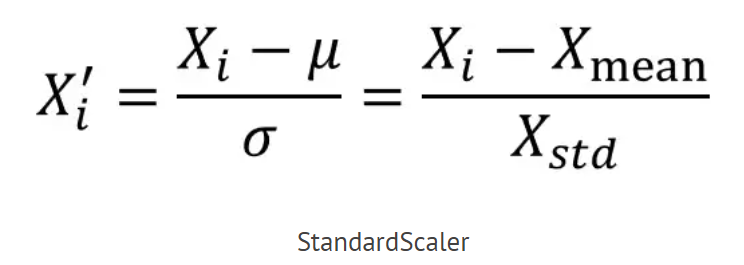

In [122]:
train['body_mass_g'] = train.apply(
    lambda x: mean_weight[x['species']][x['sex']] \
    if x['body_mass_g']!=x['body_mass_g'] \
    else x['body_mass_g'],
    axis=1
)

In [ ]:
train.head()

### 2.4 Categorical Encoding

In [ ]:
pd.get_dummies(
    data=train['sex'],
    #drop_first=True
)

In [ ]:
train = train.join(
    pd.get_dummies(data=train['sex'], drop_first=True)
)
train.head()

### 2.5 Scaling

In [126]:
def standardize(series, mean, std):
    """
    returns the standardized counterpart of a series,
    given a mean and standard deviation
    """
    return (series-mean)/std

In [127]:
numerical_features = [
    'bill_length_mm',
    'bill_depth_mm',
    'flipper_length_mm',
    'body_mass_g'
]

In [128]:
# standard scaling parameter dictionary
parameters = {}

for feature in numerical_features: 
    # populate parameter dictionary
    mean = train[feature].mean()
    std = train[feature].std()
    parameters[feature] = (mean, std)
    
    # create standadrdized numerical columns
    train[feature] = standardize(train[feature], mean, std)

In [ ]:
train.head()

### 2.6 Feature-Target Separation

In [130]:
# features
X_train = train[numerical_features + ['Male']]

# target
y_train = train['species']

In [ ]:
X_train.head()

In [ ]:
y_train

### 2.7 Model Building

**instantiate model**

In [133]:
classifier_model = LogisticRegression()

**train model**

In [ ]:
classifier_model.fit(X_train,y_train)

**model validation**

In [ ]:
training_acccuracy = classifier_model.score(X_train,y_train)
print(f"training accuracy: {round(training_acccuracy, 6)}")

### 2.8 Model Evaluation

**test data quick exploration**

In [ ]:
test.head()

In [ ]:
test.info()

**imputation**

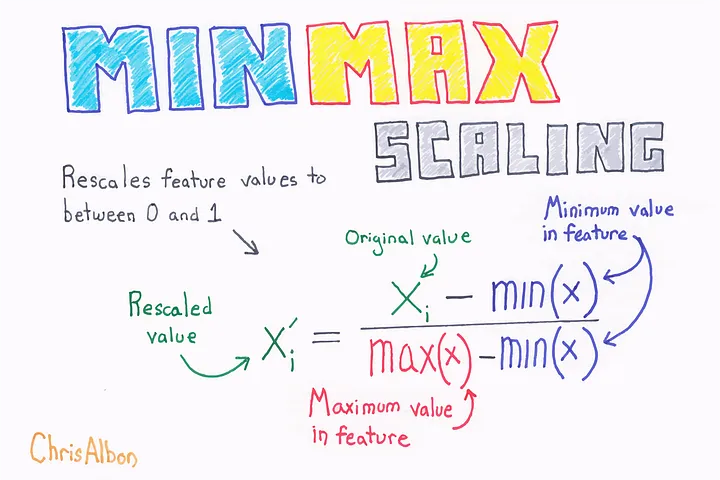

In [138]:
min_value = test['body_mass_g'].min()
max_value = test['body_mass_g'].max()

# Apply Min-Max scaling
test['body_mass_g'] = test['body_mass_g'].apply(
    lambda x: (x - min_value) / (max_value - min_value) if pd.notna(x) else x
)

**categorical encoding**

In [ ]:
test

In [ ]:
test = test.join(
    pd.get_dummies(data=test['sex'], drop_first=True)
)
test.head()

**Exercise 1: scaling**

In [141]:
for feature in numerical_features:
    # create a similar function for MinMax Scaling as we made before for Standart Scaling
    pass

In [ ]:
test.head()

**feature-target separation**

In [143]:
# features
X_test = test[numerical_features + ['Male']]

# target
y_test = test['species']

In [ ]:
X_test.head()

**model performance**

In [ ]:
test_acccuracy = classifier_model.score(X_test,y_test)
print(f"test accuracy: {round(test_acccuracy, 6)}")

In [ ]:
import pandas as pd

# Load the penguin dataset
url = "https://raw.githubusercontent.com/allisonhorst/penguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values
penguins.dropna(inplace=True)

# Display unique species
print(penguins['species'].unique())

In [ ]:
# Get unique species
unique_species = penguins['species'].unique()

# Create a DataFrame to hold the one-hot encoded values
one_hot_encoded = pd.DataFrame()

# Create one-hot encoding manually
for species in unique_species:
    one_hot_encoded[species] = (penguins['species'] == species).astype(int)

# Display the one-hot encoded DataFrame
print(one_hot_encoded.head())

In [149]:

# Load the penguin dataset
url = "https://raw.githubusercontent.com/allisonhorst/penguins/master/inst/extdata/penguins.csv"
penguins = pd.read_csv(url)

# Drop rows with missing values
penguins.dropna(inplace=True)

# Select numerical features for scaling
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [150]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler, QuantileTransformer, PowerTransformer

# Create a function to apply a scaler and plot the results
def plot_scaler(scaler, scaler_name):
    # Fit and transform the numerical features
    scaled_data = scaler.fit_transform(penguins[numerical_features])
    
    # Convert scaled data back to DataFrame for plotting
    scaled_df = pd.DataFrame(scaled_data, columns=numerical_features)
    
    # Plot the original and scaled data
    plt.figure(figsize=(12, 8))
    for i, column in enumerate(numerical_features):
        plt.subplot(2, 2, i + 1)
        sns.histplot(penguins[column], kde=True, color='blue', label='Original', stat='density', bins=10)
        sns.histplot(scaled_df[column], kde=True, color='orange', label='Scaled', stat='density', bins=10)
        plt.title(f'{scaler_name} - {column}')
        plt.legend()
    plt.tight_layout()
    plt.show()

### MinMaxScaler: 
Rescales the features to a range between 0 and 1. You’ll see the original distribution squeezed into this range.

### StandardScaler: 
Centers the data around 0 and scales it to unit variance. The resulting distribution will have a mean of 0 and a standard deviation of 1.

### RobustScaler: 
Uses the median and interquartile range, making it robust to outliers. The scaled data will reflect the central tendency without being influenced by outliers.

### MaxAbsScaler: 
Scales the features by their maximum absolute values, preserving the sparsity of the data.

### QuantileTransformer: 
Transforms the data to follow a uniform or normal distribution, which can significantly alter the shape of the distribution.

### PowerTransformer: 
Applies a power transformation to stabilize variance and make the data more normally distributed.

In [ ]:
# MinMaxScaler
plot_scaler(MinMaxScaler(), 'MinMaxScaler')

# StandardScaler
plot_scaler(StandardScaler(), 'StandardScaler')

# RobustScaler
plot_scaler(RobustScaler(), 'RobustScaler')

# MaxAbsScaler
plot_scaler(MaxAbsScaler(), 'MaxAbsScaler')

# QuantileTransformer
plot_scaler(QuantileTransformer(output_distribution='normal'), 'QuantileTransformer')

# PowerTransformer
plot_scaler(PowerTransformer(method='yeo-johnson'), 'PowerTransformer')

<hr style="border:2px solid black">

## Exercise 2: Pumpkin dataset

## References

- [8 Feature Engineering Techniques for Machine Learning](https://www.projectpro.io/article/8-feature-engineering-techniques-for-machine-learning/423)

- [Fundamental Techniques of Feature Engineering for Machine Learning](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)